In [29]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)
from scipy.io import loadmat

OpenCV Version : 4.4.0 


In [30]:
#Leitura da imagem (.jpg):
image = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_33.jpg"), cv2.COLOR_BGR2RGB)

In [31]:
#Leitura das anotações (.mat):
annots = loadmat('ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_33.mat')
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])

In [32]:
a = annots["image_info"]
type(a)

numpy.ndarray

In [33]:
#Função que recebe o id (inteiro) da imagem e retorna duas listas com as posições x e y, respectivamente, das anotações
def getGTpoints(number, part):
    
    #Abrindo o arquivo com as anotações em .mat:
    annots = loadmat('ShanghaiTech/part_{0}/train_data/ground-truth/GT_IMG_{1}.mat'.format(part, number))
    a = annots["image_info"]
    #Lendo o elemento do array que possui as anotações:
    ground_truth = a[0][0][0][0][0]
    #Cria duas listas, com a posição no eixo x e no eixo y de cada anotação:
    x = []
    y = []
    for e in ground_truth:
        x.append(e[0])
        y.append(e[1])
        
    #Retorna as listas x e y
    return x, y

Digite a parte do Dataset:A
Digite o id da Imagem:98


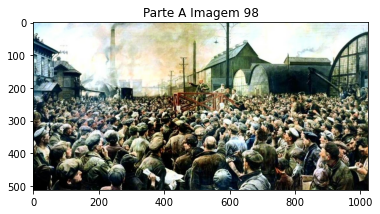

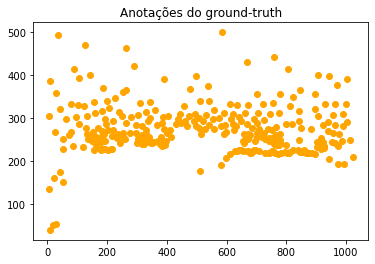

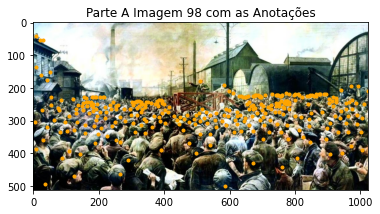

In [67]:
part = input("Digite a parte do Dataset:")
n = int(input("Digite o id da Imagem:"))
x, y = getGTpoints(n, "A")

#Plot da Imagem:
image = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n)), cv2.COLOR_BGR2RGB)
plt.title("Parte {0} Imagem {1}".format(part, n))
plt.imshow(image)
plt.show()

#Gráfico dos pontos com a posição de cada cabeça:
plt.plot(x, y, "o", color="orange")
plt.title("Anotações do ground-truth")
plt.show()

#Plot da imagem com as anotações:
plt.imshow(cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n)), cv2.COLOR_BGR2RGB))
plt.plot(x, y, "o", markersize=3, color="orange")
plt.title("Parte {0} Imagem {1} com as Anotações".format(part, n))
plt.show()

In [150]:
def make_ranges(l1,l2):
    saida = []
    i = 0
    while i<3:
        k = 0
        while k<3:
            saida.append([[l1[i],l1[i+1]],[l2[k],l2[k+1]]])
            k+=1
        i+=1
    return saida

def checkGTpoints(img, list_x,list_y):
    range_y, range_x = getRanges(img)
    list_ranges = make_ranges(range_y, range_x)
    saida = []
    for r in list_ranges:
        #r[0] é range de y e r[1] é range de x
        i=0
        cont = 0
        while i<len(list_x):
            if (r[0][1] > list_y[i] > r[0][0]) and (r[1][1] > list_x[i] > r[1][0]):
            #if (int(list_x[i]) in range(r[0][0],r[0][1])) and (int(list_y[i]) in range(r[1][0],r[1][1])):
                cont += 1
            i+=1
        saida.append(cont)
    return saida
                

def imagem_recorta(img):
    range_y, range_x = getRanges(img)
    saida = []
    i = 0
    list_ranges = make_ranges(range_y, range_x)
    for r in list_ranges:
        patch = recorta(r[0],r[1], img)
        saida.append(patch)
    return saida
    
def recorta(y, x, img):
    #Preciso retornar 1 lista com os valores dos pixels de cada patch...
    saida = []
    x_min = x[0]
    x_max = x[1]
    y_min = y[0]
    y_max = y[1]
    
    for y in range(y_min,y_max):    
        lista = []
        for x in range(x_min,x_max):
            lista.append(img[y][x])
        saida.append(lista)
    return saida

def getRanges(img):
    height, width, chanel = img.shape
    heigh_ = divide_em_tres(height-1)
    width_ = divide_em_tres(width-1)
    return heigh_,width_
    
def divide_em_tres(value):
    v2 = int(value/3)
    v3 = int(2*value/3)
    v4 = int(value)
    return [0,v2,v3, value]

In [154]:
li = checkGTpoints(img,x,y)
print(li, sum(li))

[0, 0, 0, 21, 63, 243, 37, 51, 78] 493


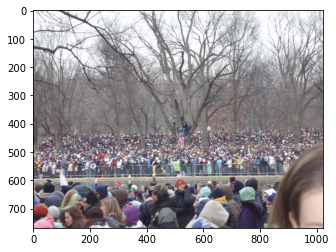

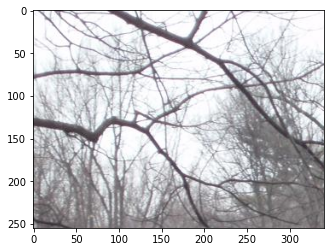

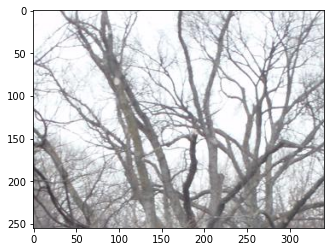

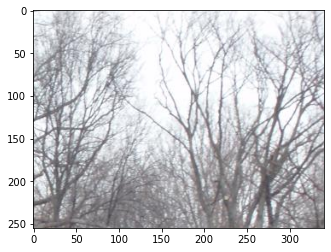

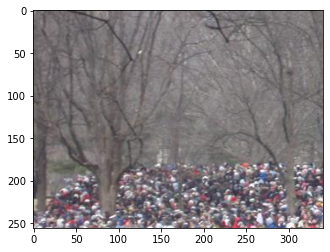

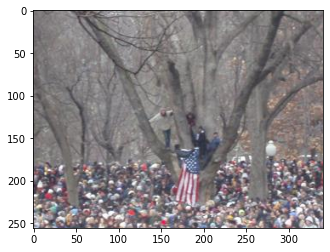

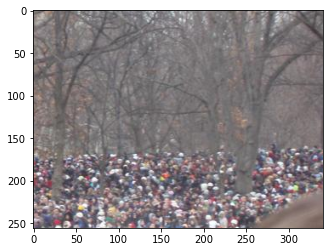

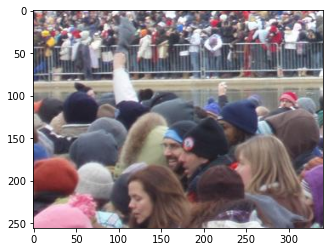

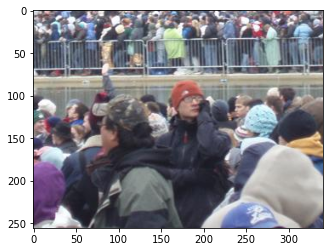

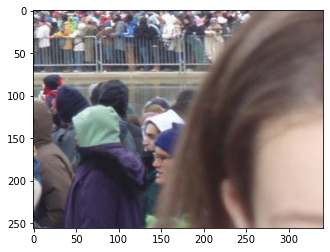

In [148]:
#Plot da Imagem:
n=1
img = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n)), cv2.COLOR_BGR2RGB)
x, y = getGTpoints(n, "A")
plt.imshow(img)
plt.show()

li = imagem_recorta(img)
for i in li:
    plt.imshow(i)
    plt.show()

In [164]:
h = []
h_no_zero = []
for e in range (1,182):
    img = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(e)), cv2.COLOR_BGR2RGB)
    x, y = getGTpoints(e, "A")
    li = checkGTpoints(img,x,y)
    for i in li:
        h.append(i)
        if i!=0:
            h_no_zero.append(i)

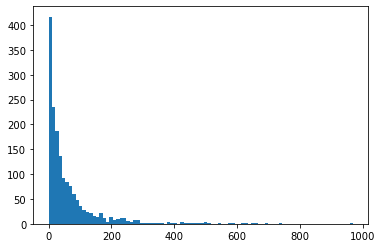

In [171]:
plt.hist(h,bins=90);